<a href="https://colab.research.google.com/github/Udang2023/PSet0-Abdurrahman-Huda-2311501338-PTI2023-/blob/main/klasifikasi_cnn_batu_gunting_kertas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import dahulu semua library yang dibutuhkan**

In [1]:
import pandas as pd #Python Data Analysis Library
import numpy as np #Python Scientific Library (Umumnya membantu
#dalam urusan list)

#Selective import modul-modul Scikit Learn sa
#(Scikit Learn memiliki banyak modul machine learning)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#**Mengakses Datasate**

##Mengunduh datasate dari link Dicoding Academy

In [2]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

##Mengestrak file Zip

In [3]:
import os                                                                         #Mengimpor modul os mengakses folder data
import zipfile                                                                    #Mengimpor modul zipfile untuk membaca file zip

local_zip = '/content/rockpaperscissors.zip'                                      #Mendefinisikan file zip yang akan diekstrak
zip_ref = zipfile.ZipFile(local_zip, 'r')                                         #Mengekstrak file zip
zip_ref.extractall('/content/')                                                   #Menempatkan file hasil ekstrak zip
zip_ref.close()                                                                   #Menghentikan fungsi zip.ref

##Mengiapkan file untuk data gambar gunting, batu, kertas

In [4]:
import os                                                                         #Mengimpor modul os mengakses folder data
fold_gunting = os.path.join('/content/rockpaperscissors/scissors')                #Mendefinisikan Folder Training untuk gambar Gunting
fold_batu= os.path.join('/content/rockpaperscissors/rock')                        #Mendefinisikan Folder Training untuk gambar Batu
fold_kertas = os.path.join('/content/rockpaperscissors/paper')                    #Mendefinisikan Folder Training untuk gambar Kertas

print('Jumlah total gambar gunting:', len(os.listdir(fold_gunting)))              #Menampilkan jumlah gambar di dalam folder Gunting
print('Jumlah total gambar batu:', len(os.listdir(fold_batu)))                    #Menampilkan jumlah gambar di dalam folder Batu
print('Jumlah total gambar kertas:', len(os.listdir(fold_kertas)))                #Menampilkan jumlah gambar di dalam folder Kertas

print("Menampilkan nama file gambar:")
file_gunting = os.listdir(fold_gunting)                                           #Mendaftar file di dalam folder gunting
print("Gunting:",file_gunting[:5])                                                #Menampilkan nama 5 file pertama di dalam folder gunting

file_batu = os.listdir(fold_batu)                                                 #Mendaftar file di dalam folder batu
print("Batu:",file_batu[:5])                                                      #Menampilkan nama 5 file pertama di dalam folder batu

file_kertas = os.listdir(fold_kertas)                                             #Mendaftar file di dalam folder kertas
print("Kertas:",file_kertas[:5])                                                  #Menampilkan nama 5 file pertama di dalam folder kertas

Jumlah total gambar gunting: 750
Jumlah total gambar batu: 726
Jumlah total gambar kertas: 712
Menampilkan nama file gambar:
Gunting: ['YqEvBlhrl5XkzIlO.png', 'Rc1pRmm4p20kAl7A.png', 'jrogjyPvn83c1ZRy.png', 'wT8z7icdMJt816Ix.png', 'JOwOktLqjDF0qFIW.png']
Batu: ['nGW6IQjCFT5tCw6j.png', '9STiLxSOXvh5kjda.png', 'iwM1SIgty28sLu2p.png', 'JmcPS1QNxo3NDlk0.png', '2O9XPBJRT119drWX.png']
Kertas: ['VD4twqBeFDIHSovy.png', '6BIKQpfZEfQkCvrz.png', 'pUCjvjdpH5HSaWxl.png', '3K6a8bG8j1YTH1l0.png', 'xnLyw2TBZF8e2vcr.png']


##Menampilkan gambar Gunting, Batu, Kertas dalam satu tampilan

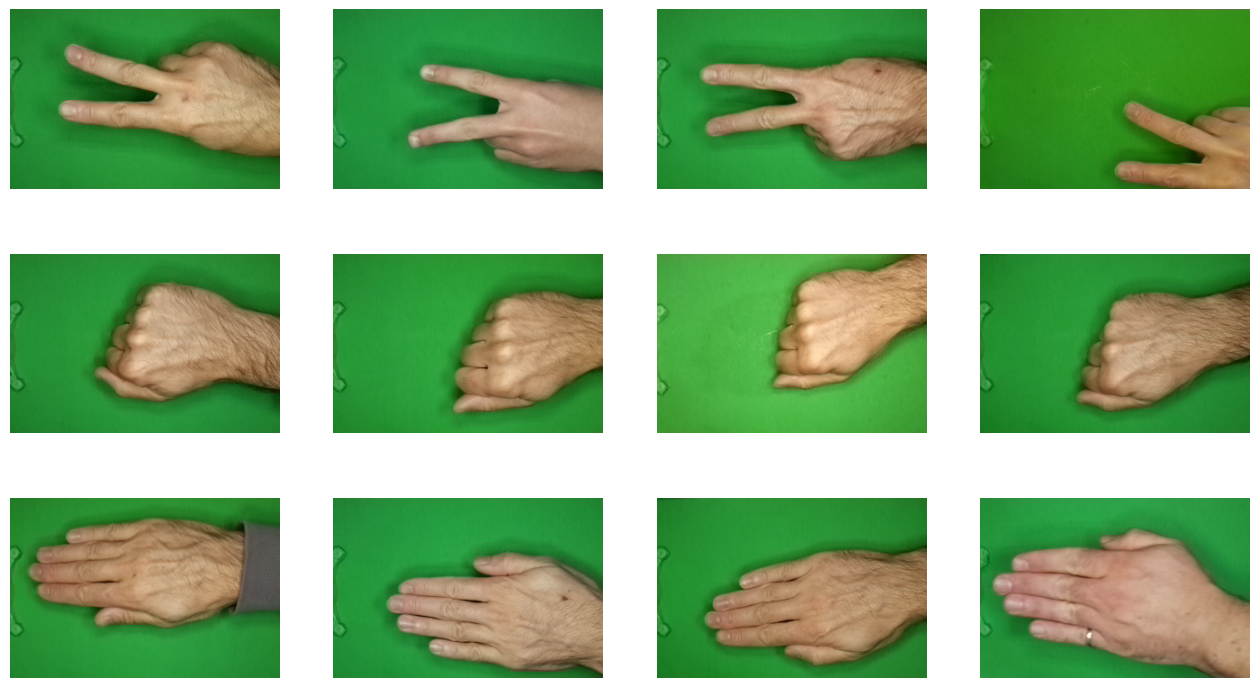

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt                                                     #Mengimpor modul matplotlib
import matplotlib.image as mpimg

nrows = 3                                                                           #Jumlah baris tampilan gambar
ncols = 4                                                                           #Jumlah baris tampilan gambar

pic_index = 0                                                                        #Index awal untuk iterasi gambar

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)                                           #Mengatur gambar output matplotlib, dan ukurannya agar menjadi 4*6 gambar

pic_index += 4                                                                      #Index tambah bertambah 4 setiap baris
gbr_tampil_gunting  = [os.path.join(fold_gunting, fname)                              #Menampilkan gambar gunting
                      for fname in file_gunting[pic_index-4:pic_index]]
gbr_tampil_batu     = [os.path.join(fold_batu, fname)                               #Menampilkan gambar batu
                      for fname in file_batu[pic_index-4:pic_index]]
gbr_tampil_kertas   = [os.path.join(fold_kertas, fname)                             #Menampilkan gambar kertas
                      for fname in file_kertas[pic_index-4:pic_index]]

for i, img_path in enumerate(gbr_tampil_gunting+gbr_tampil_batu+gbr_tampil_kertas):
  sp = plt.subplot(nrows, ncols, i + 1)                                             #Mengatur subplot; indeks subplot dimulai dari 1
  sp.axis('Off')                                                                    #Tidak menampilkan Gridlines

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#**Mengimport modul yang dugunakan**

In [6]:
!pip install keras-preprocessing
import tensorflow as tf                                                           #Mengimpor modul tensorflow
import keras_preprocessing                                                        #Mengimpor modul keras
from keras_preprocessing import image                                             #Mengimpor keras_preprocessing untuk gambar
from keras_preprocessing.image import ImageDataGenerator                          #Mengimpor Image Generator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00


##**Melakukan Augmentasi & Pemisahan Data menjadi Training dan Validation**

In [7]:
BASIS_DIR = "/content/rockpaperscissors/rps-cv-images/"                                          #Menyiapkan folder utama
training_datagen = ImageDataGenerator(                                                           #Image generator
      rescale = 1./255,                                                                          #Menormalisasi data
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>AUGMENTASI<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
	    rotation_range=40,                                                                         #Menerapkan skenario rotasi gambar hingga 40 derajat
      width_shift_range=0.2,                                                                     #Menerapkan skenario pelebaran gambar hingga hingga sebanyak 0.2 dari ukuran asli
      height_shift_range=0.2,                                                                    #Menerapkan skenario peninggian gambar hingga hingg sebanyak 0.2 dari ukuran asli
      shear_range=0.2,                                                                           #Menerapkan skenario pemangkasan gambar gambar hingga sebanyak 0.2 dari ukuran asli
      zoom_range=0.2,                                                                            #Menerapkan skenario zoom gambar hingga sebesar 0.2
      horizontal_flip=True,                                                                      #Menerapkan skenario putar balik gambar secara horizontal
      fill_mode='nearest',                                                                       #Mengisi piksel yang kosong dengan nilai piksel terdekat
#>>>>>>>>>>>MEMECAH DATA MENJADI DATA TRAINING DAN DATA VALIDASI<<<<<<<<<<<<<<<<
      validation_split=0.2                                                                       #80% Data Training, 20% Data Validasi
      )

##Pembelaan data menggunakan image data generator berdasarkan folder

In [8]:
train_generator = training_datagen.flow_from_directory(                                      #Generator data training
	BASIS_DIR,                                                                                 #Folder target untuk digenerasi
	target_size=(150,150),                                                                     #Mengubah resolusi seluruh gambar menjadi 150x150 piksel
	class_mode='categorical',                                                                  #Kelas data kategori untuk klasifikasi multivariabel
  shuffle=True,
  subset='training'                                                                          #Untuk data training
  )

validation_generator = training_datagen.flow_from_directory(                                 #Generator data validasi
	BASIS_DIR,                                                                                 #Folder target untuk digenerasi
	target_size=(150,150),                                                                     #Mengubah resolusi seluruh gambar menjadi 150x150 piksel
	class_mode='categorical',                                                                  #Kelas data kategori untuk klasifikasi multivariabel
  shuffle=True,
  subset='validation'                                                                        #Untuk data validasi
  )

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


#**Membangun Model Jaringan Saraf Tiruan**

##Model yang digunakan adalah model Sequential

In [9]:
model = tf.keras.models.Sequential([                                                  #Membentuk model sequential
                                                                                      #Bentuk input adalah gambar dengan ukuran 150x150 dengan 3 byte warna
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),  #Layer Konvolusi pertama
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                             #Layer Konvolusi kedua
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                             #Layer Konvolusi ketiga
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),                                                        #Layer input untuk Deep Learning Neural Network
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128, activation='relu'),                                   #Hiden layer pertama dengan 512 neuron

    tf.keras.layers.Dense(512, activation='relu'),                                   #Hiden layer kedua dengan 512 neuron

    tf.keras.layers.Dense(3, activation='softmax')                                   #Layer output
])

model.summary()                                                                      #Menampilkan summary model
Model: "sequential_2"

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 9248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,183,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,265,795 (4.83 MB)

 Trainable params: 1,265,795 (4.83 MB)

 Non-trainable params: 0 (0.00 B)

#**Melakukan Kompilasi Model**

In [10]:
model.compile(loss = 'categorical_crossentropy',                                  #Loss function Yang digunakan untuk Klasifikasi Kategori Lebih Dari 2
              optimizer='rmsprop',                                                #Fungsi optimizer(Yang Pernah diajarkan adalah 'adam')
              metrics=['accuracy'])                                               #Menampilkan akurasi model training

#Melatih Model Jaringan Saraf Tiruan

In [11]:
history=model.fit(
    train_generator,                                                              #Data training hasil generasi
    steps_per_epoch=4,                                                            #Jumlah batch yang akan dieksekusi pada setiap epoch
    epochs=25,                                                                    #Jumlah perulangan komputasi(epoch)
    validation_data=validation_generator,                                         #Menampilkan akurasi pengujian data validasi
    validation_steps=4,                                                           #Jumlah batch yang akan dieksekusi pada setiap epoch
    verbose=2
    )

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 - 9s - 2s/step - accuracy: 0.2500 - loss: 1.5671 - val_accuracy: 0.3281 - val_loss: 1.1036
Epoch 2/25
4/4 - 6s - 2s/step - accuracy: 0.3672 - loss: 1.1035 - val_accuracy: 0.3281 - val_loss: 1.1027
Epoch 3/25
4/4 - 4s - 1s/step - accuracy: 0.3361 - loss: 1.1064 - val_accuracy: 0.3594 - val_loss: 1.0933
Epoch 4/25
4/4 - 3s - 778ms/step - accuracy: 0.3750 - loss: 1.0909 - val_accuracy: 0.3774 - val_loss: 1.0932
Epoch 5/25


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4/4 - 6s - 2s/step - accuracy: 0.3828 - loss: 1.1008 - val_accuracy: 0.3438 - val_loss: 1.1047
Epoch 6/25
4/4 - 4s - 1s/step - accuracy: 0.4062 - loss: 1.0882 - val_accuracy: 0.3672 - val_loss: 1.0925
Epoch 7/25
4/4 - 5s - 1s/step - accuracy: 0.3906 - loss: 1.0971 - val_accuracy: 0.3906 - val_loss: 1.0822
Epoch 8/25
4/4 - 9s - 2s/step - accuracy: 0.3828 - loss: 1.0788 - val_accuracy: 0.4906 - val_loss: 1.0629
Epoch 9/25
4/4 - 5s - 1s/step - accuracy: 0.4375 - loss: 1.0718 - val_accuracy: 0.4609 - val_loss: 1.0444
Epoch 10/25
4/4 - 6s - 2s/step - accuracy: 0.4453 - loss: 1.0509 - val_accuracy: 0.3828 - val_loss: 1.0779
Epoch 11/25
4/4 - 5s - 1s/step - accuracy: 0.3828 - loss: 1.0861 - val_accuracy: 0.4297 - val_loss: 1.0738
Epoch 12/25
4/4 - 3s - 663ms/step - accuracy: 0.3984 - loss: 1.0712 - val_accuracy: 0.3585 - val_loss: 1.0927
Epoch 13/25
4/4 - 4s - 1s/step - accuracy: 0.4297 - loss: 1.0663 - val_accuracy: 0.3906 - val_loss: 1.0760
Epoch 14/25
4/4 - 4s - 988ms/step - accuracy: 0.45

#**Ploting Akurasi Training dan Validasi**

##Melihat pergerakan besaran nilai akurasi Training dan Validasi

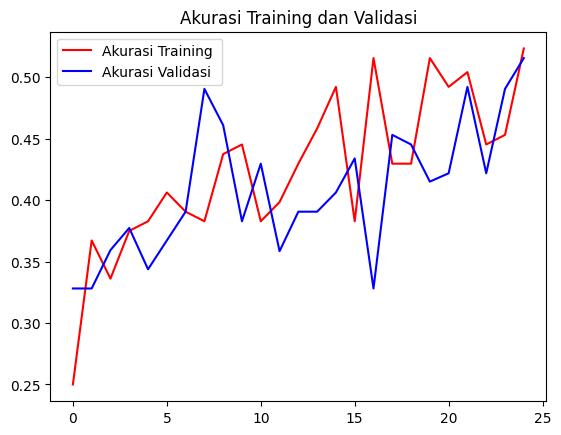

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt                                                   #Mengimpor modul matplotlib
acc = history.history['accuracy']                                                 #Nilai akurasi training
val_acc = history.history['val_accuracy']                                         #Nilai akurasi validasi
loss = history.history['loss']                                                    #Nilai loss training
val_loss = history.history['val_loss']                                            #Nilai loss validasi

epochs = range(len(acc))                                                          #Jumlah epoch

plt.plot(epochs, acc, 'r', label='Akurasi Training ')                             #Plot nilai akurasi training
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')                          #Plot nilai akurasi validasi
plt.title('Akurasi Training dan Validasi')                                        #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()
plt.show()

#**Uji Coba Model Klasifikasi Gambar Tangan Gunting, Batu, Kertas**

##Melakukan simulasi klasifikasi, mengunggah gambar dan model menentukan apakah gambar tersebut merupakan gambar tangan yang membentuk Gunting, Batu, atau Kertas

Saving 3JN7OPsnxDBpcVeD.png to 3JN7OPsnxDBpcVeD.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
3JN7OPsnxDBpcVeD.png
Tangan Ini Menunjukkan bentuk KERTAS


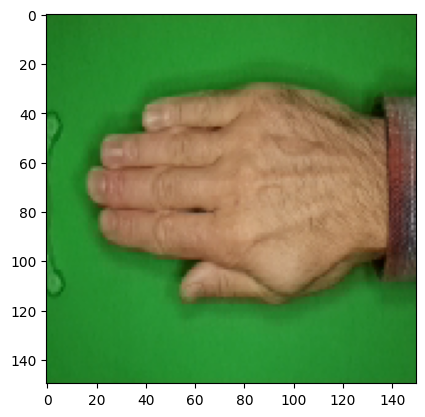

In [14]:
import numpy as np                                                                                                        #Mengimpor modul numpy
from google.colab import files                                                                                            #Mengimpor modul import file
from keras.preprocessing import image                                                                                     #Mengimpor modul keras_preprocessing untuk gambar

uploaded = files.upload()                                                                                                 #Mengunggah gambar yang akan dikenali model

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))                                                                      #Mengubah ukuran gambar menjadi 150x150 piksel
  imgplot = plt.imshow(img)                                                                                               #Menampilkan gambar yang diunggah
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('Tangan Ini Menunjukkan bentuk KERTAS')                                                                         #Jika gambar tangan membentuk Kertas, tampilkan tulisan "Kertas"
  elif classes[0][1]==1:
    print('Tangan Ini Menunjukkan bentuk BATU')                                                                           #Jika gambar tangan membentuk Batu, tampilkan tulisan "Batu"
  elif classes[0][2]==1:
    print('Tangan Ini Menunjukkan bentuk GUNTING')                                                                        #Jika gambar tangan membentuk Gunting, tampilkan tulisan "Gunting"
  else:
    print('Tidak Diketahui')                                                                                              #Jika gambar yang diunggah selain gambar tangan yang diinginkan, tampilkan "Tidak Diketahui"

#**Program Klasifikasi Gambar dengan Kriteria Henti(Callback)**

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 9248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       1,183,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,265,795 (4.83 MB)

 Trainable params: 1,265,795 (4.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
16/16 - 21s - 1s/step - accuracy: 0.3459 - loss: 1.1173 - val_accuracy: 0.3047 - val_loss: 1.1090
Epoch 2/100
16/16 - 15s - 940ms/step - accuracy: 0.3535 - loss: 1.1072 - val_accuracy: 0.3281 - val_loss: 1.0937
Epoch 3/100
16/16 - 15s - 932ms/step - accuracy: 0.4180 - loss: 1.0878 - val_accuracy: 0.4375 - val_loss: 1.0645
Epoch 4/100
16/16 - 4s - 245ms/step - accuracy: 0.4196 - loss: 1.0918 - val_accuracy: 0.3962 - val_loss: 1.0864
Epoch 5/100
16/16 - 46s - 3s/step - accuracy: 0.4036 - loss: 1.0817 - val_accuracy: 0.5312 - val_loss: 1.0166
Epoch 6/100
16/16 - 15s - 963ms/step - accuracy: 0.4531 - loss: 1.0488 - val_accuracy: 0.5547 - val_loss: 0.9864
Epoch 7/100
16/16 - 15s - 925ms/step - accuracy: 0.5371 - loss: 0.9816 - val_accuracy: 0.5703 - val_loss: 0.9467
Epoch 8/100
16/16 - 4s - 250ms/step - accuracy: 0.5536 - loss: 0.9590 - val_accuracy: 0.6792 - val_loss: 0.8383
Epoch 9/100
16/16 - 17s - 1s/step - accuracy: 0.6250 - loss: 0.8747 - val_accuracy: 0.6562 - val_loss: 0

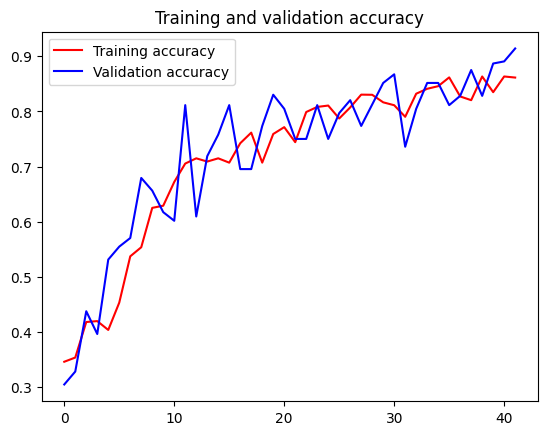

<Figure size 640x480 with 0 Axes>

In [15]:
#>>>>>>>>>>>>>>>>>>>>>>>>>KRITERIA HENTI TRAINING MODEL<<<<<<<<<<<<<<<<<<<<<<<<<
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9):
      print("\nPELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 90%!")
      self.model.stop_training = True

callbacks = myCallback()

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>MEMBANGUN MODEL<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>MENGKOMPILASI MODEL<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>MELATIH MODEL<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
history=model.fit(
    train_generator,
    steps_per_epoch=16,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=2,
    callbacks=[callbacks]
    )

#>>>>>>>>>>>>>>>>>>>>>>>>PLOT AKURASI TRAINING & VALIDASI<<<<<<<<<<<<<<<<<<<<<<<
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()
Model: "sequential_4"